In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')
import lsst.daf.persistence as daf_persistence
import lsst.afw.geom as afwGeom
from lsst.afw.geom import Angle

In [2]:
from python.notebook_utils import look, SimMatcher, DummyFilter
from python.notebook_utils import plot_spectrum, plot_quasar_spectrum, plot_color, plot_quasar_color
from python.simulation_utils import simulation_wrapper

In [3]:
seed = 6
n_star = 10000
n_quasar = 1000
attenuation = 20.
output_directory = "/Users/sullivan/LSST/simulations/test%1i_quasars/" % seed
sim = simulation_wrapper(seed=seed, n_star=n_star, n_quasar=n_quasar, output_directory=output_directory,
                         attenuation=attenuation, wavelength_step=10.,
                         write_catalog=False, write_fits=False, do_simulate=False)

Number and flux contribution of stars of each type:
 [M 7594| 1.54%] [K 1247| 2.14%] [G 788| 3.47%] [F 286| 4.12%] [A 73| 13.12%] [B 12| 75.61%] [O 0| 0.00%]


Set up the general parameters to use for all of the simulations 

<IPython.core.display.Javascript object>


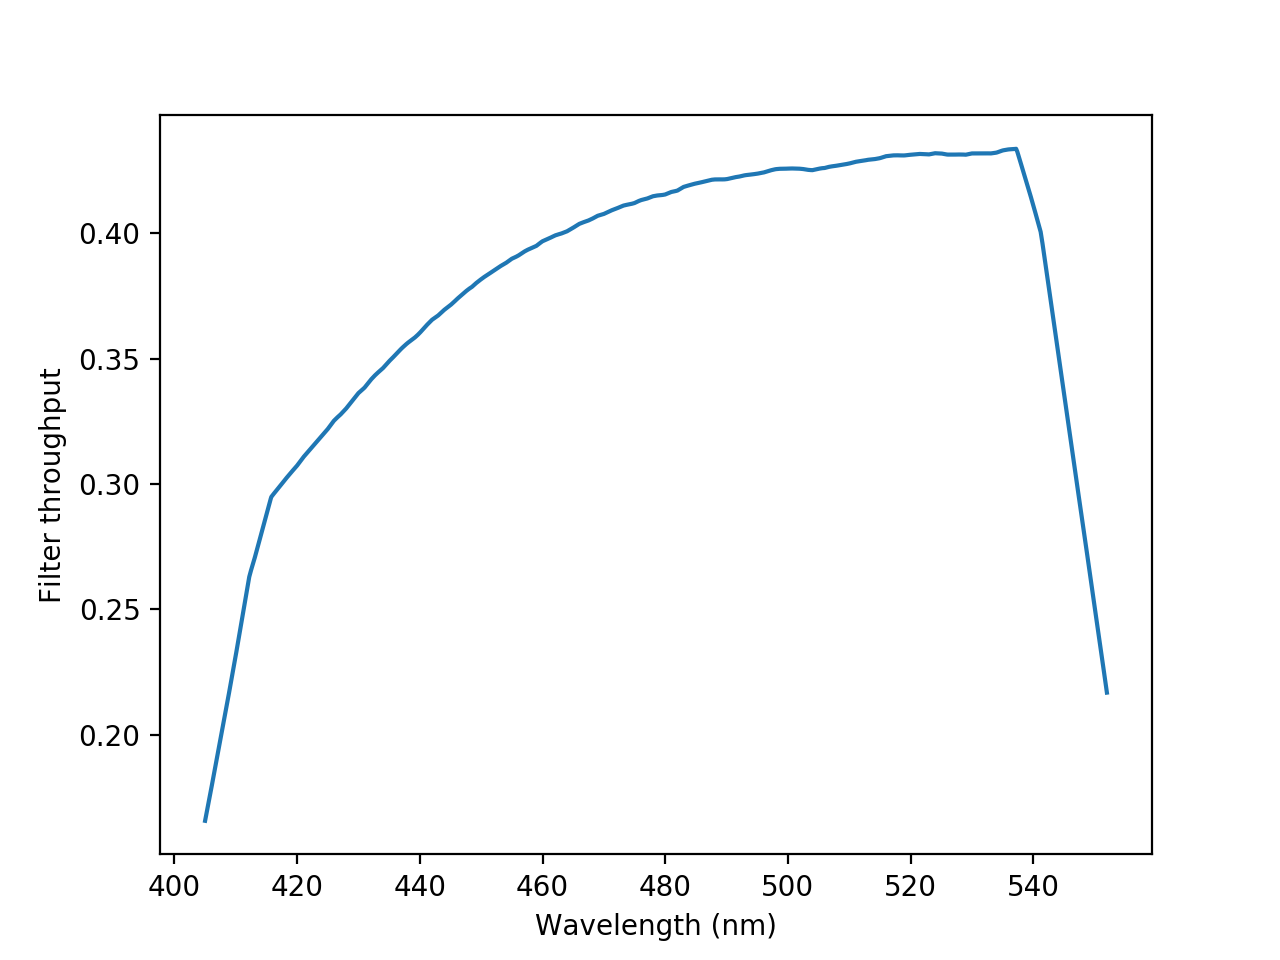

Text(0,0.5,'Filter throughput')

In [4]:
sim_bp = sim.bandpass_highres.getBandpass()
plot_1 = afwDisplay.Display(1)
plt.plot(sim_bp[0], sim_bp[1],)
    
plt.xlabel('Wavelength (nm)')
plt.ylabel('Filter throughput')

In [5]:
simMatcher = SimMatcher(sim, tolerance=.1/3600, verbose=True)

Multiple matches
Multiple matches
Multiple matches
Multiple matches
Multiple matches
Multiple matches
Matched: 2477, Unmatched: 7522
Matched: 237, Unmatched: 762


In [86]:
numDcrSubfilters = 3

In [87]:
filterInfo = DummyFilter()

In [117]:
repository = output_directory + 'input_data/rerun/processed_data/rerun/f%i_base_noSplit/' % numDcrSubfilters

Load measurements from the DCR model

In [118]:
butler_Cat = daf_persistence.Butler(repository)
meas_cats = [butler_Cat.get("dcrCoadd_meas",dataId={'tract':0,'patch':'1,1','filter':'g',
                                                    'subfilter':_s, 'numSubfilters':numDcrSubfilters})
             for _s in range(numDcrSubfilters)]

In [119]:
cat_matches = simMatcher.match_measurement(meas_cats[0], use_quasars=False, verbose=True)
quasar_matches = simMatcher.match_measurement(meas_cats[0], use_quasars=True, verbose=True)

Matched: 357, Unmatched: 419
Matched: 217, Unmatched: 559


651 2449
Temperature: 6894.004134K
Type F
sim coordinates: 289.270204, -30.244156
sim x,y: 755.586013, 518.435942
meas coordinates: 289.216924, -30.219553
meas x,y: 1467.816111, 1410.181895
[4715.57337123 5765.50608077 4962.4348347 ]
[43085.57105949 48612.65260839 46923.7913892 ]
Rescale factor: 0.111407


<IPython.core.display.Javascript object>


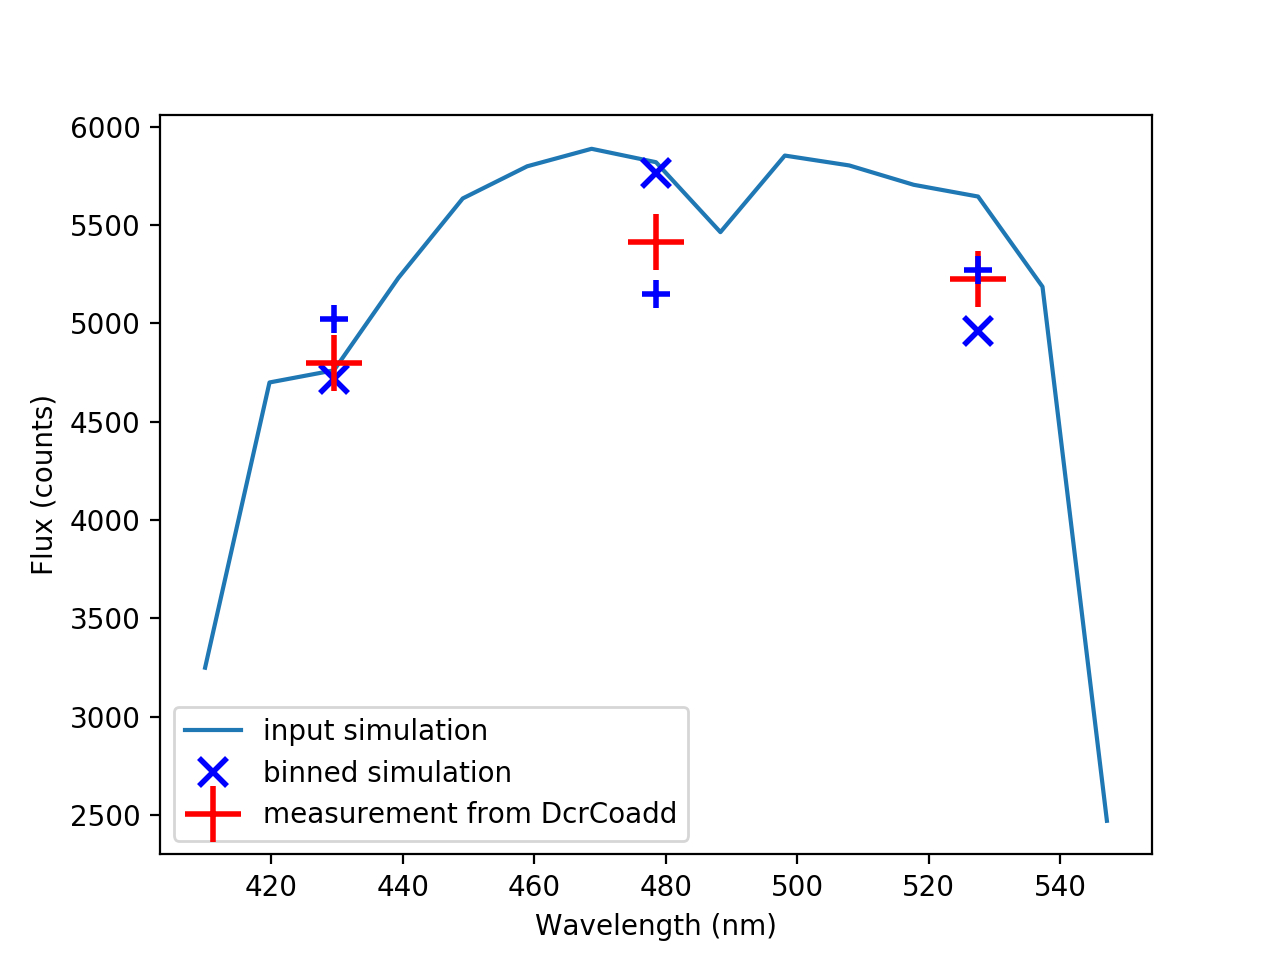

In [122]:
temperature = 6900
ind = simMatcher.find_spectrum(cat_matches, temperature)
print(ind, cat_matches[ind])
markersize = 20
plot_spectrum(sim, filterInfo, meas_cats, ind, cat_matches=cat_matches, star_T=simMatcher.star_T,
              rescale=True, use_throughput=False, markersize=markersize, window=2)
names = ['input simulation', 'binned simulation','measurement from DcrCoadd']

plt.legend(names)

Redshift: 2.726882
sim coordinates: 289.279496, -30.226994
sim x,y: 871.236330, 765.544519
meas coordinates: 289.258922, -30.244775
meas x,y: 945.260441, 1047.036403
[2935.85269094 4114.80462059 2814.23246322]
[17092.87176782 22545.87893064 17687.93381137]
Rescale factor: 0.172082


<IPython.core.display.Javascript object>


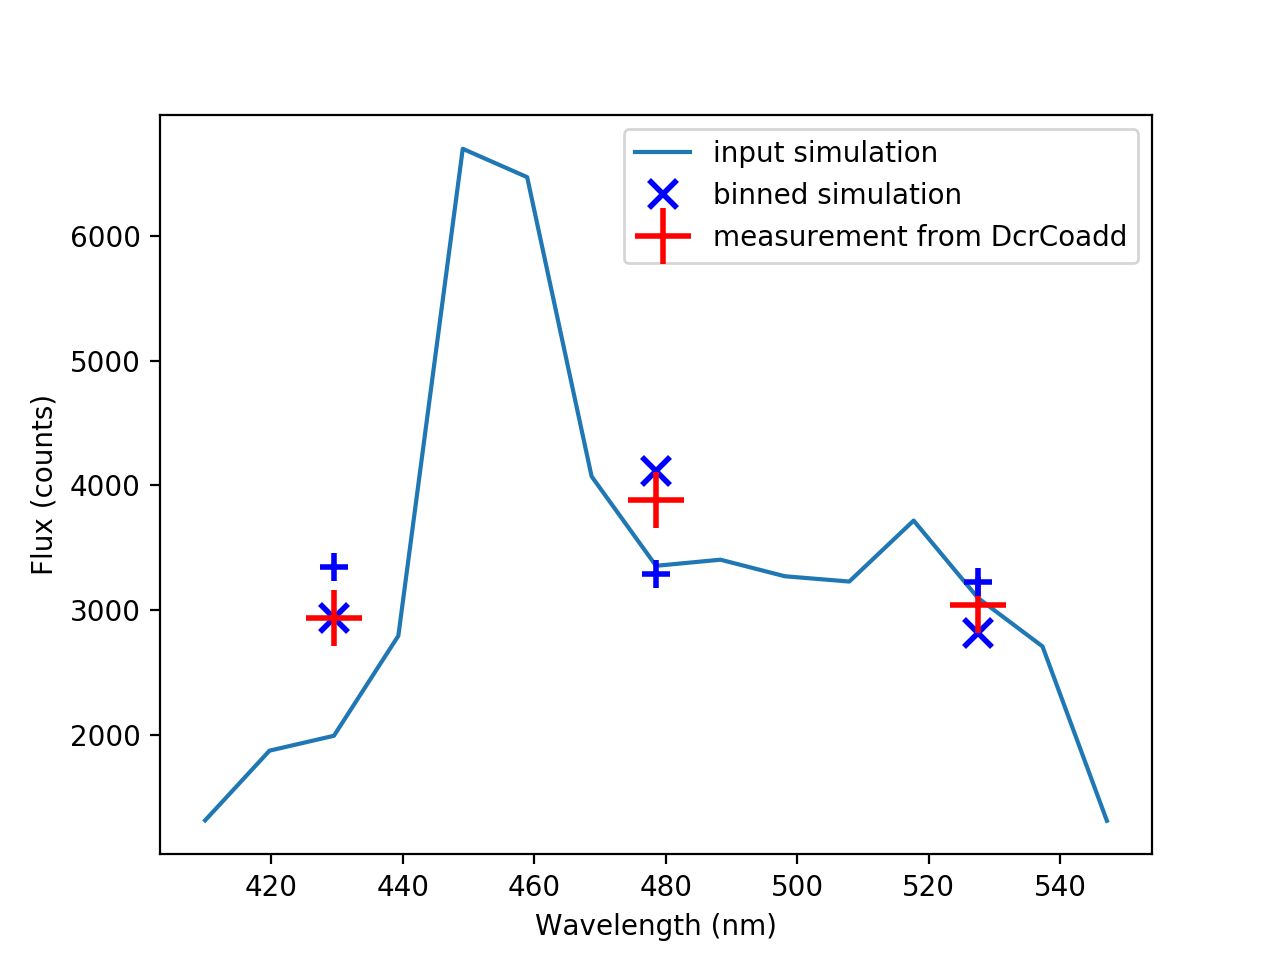

In [121]:
redshift = 2.7
ind = simMatcher.find_quasar_spectrum(quasar_matches, redshift)
markersize = 20
plot_quasar_spectrum(sim, filterInfo, meas_cats, ind, cat_matches=quasar_matches, quasar_Z=simMatcher.quasar_Z,
                     rescale=True, use_throughput=False, markersize=markersize, window=3)
names = ['input simulation', 'binned simulation','measurement from DcrCoadd']

plt.legend(names)

<IPython.core.display.Javascript object>


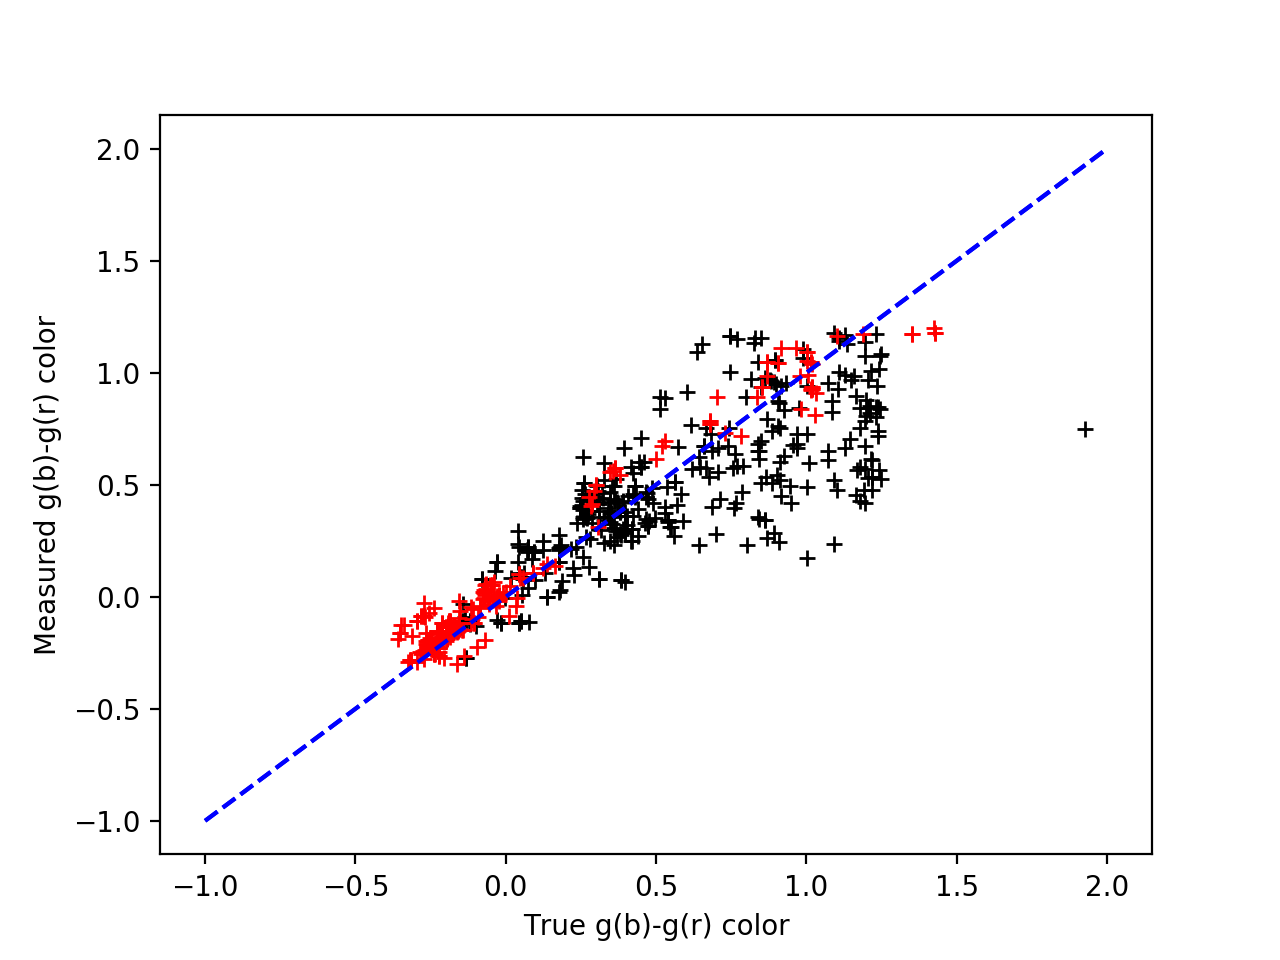

In [107]:
plot_color(sim, filterInfo, meas_cats, cat_matches, use_throughput=False, window=4, flux_min=500)
plot_quasar_color(sim, filterInfo, meas_cats, quasar_matches, use_throughput=False, window=4)

<IPython.core.display.Javascript object>


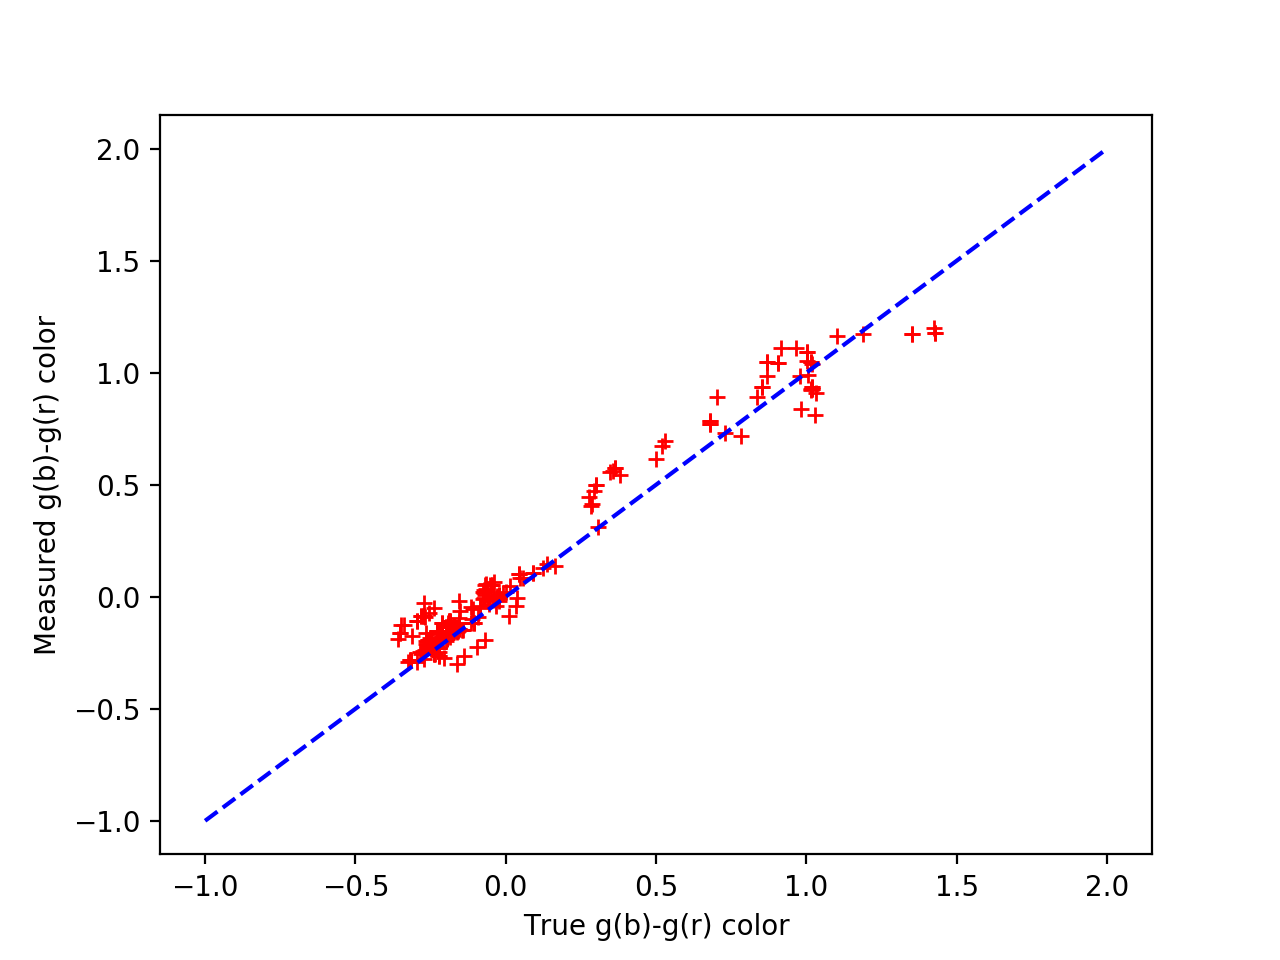

In [108]:
plot_quasar_color(sim, filterInfo, meas_cats, quasar_matches, use_throughput=False, window=5)